<a href="https://colab.research.google.com/github/Raushan787/Well_Log_Visual/blob/main/Well_log_Visualization_using_Lasio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import  the Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install lasio
import lasio





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 1.7 MB/s eta 0:00:00


In [ ]:
#Read the data
data=lasio.read("15-9-19_SR_COMP_logdata.LAS")
dataset=data.df()



In [ ]:
#Visual of top 5 data set
dataset.head()

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359
3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028
3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958
3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929
3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940


Detail

AC for acoustic compressional slowness

CALI for borehole caliper

DEN for bulk density

GR for gamma ray

NEU for neutron porosity

RDEP for deep resisitivity

RMED for medium resistivity

In [ ]:
#Replace DEPT AS DEPTH FOR beter understanding
dataset.rename(columns={"DEPT":"DEPTH"},inplace=True)


In [ ]:
#changes to the original dataframe object.
dataset.reset_index(inplace=True)
dataset.head()

,DEPT,AC,CALI,DEN,GR,NEU,RDEP,RMED
0,3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359
1,3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028
2,3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958
3,3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929
4,3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940


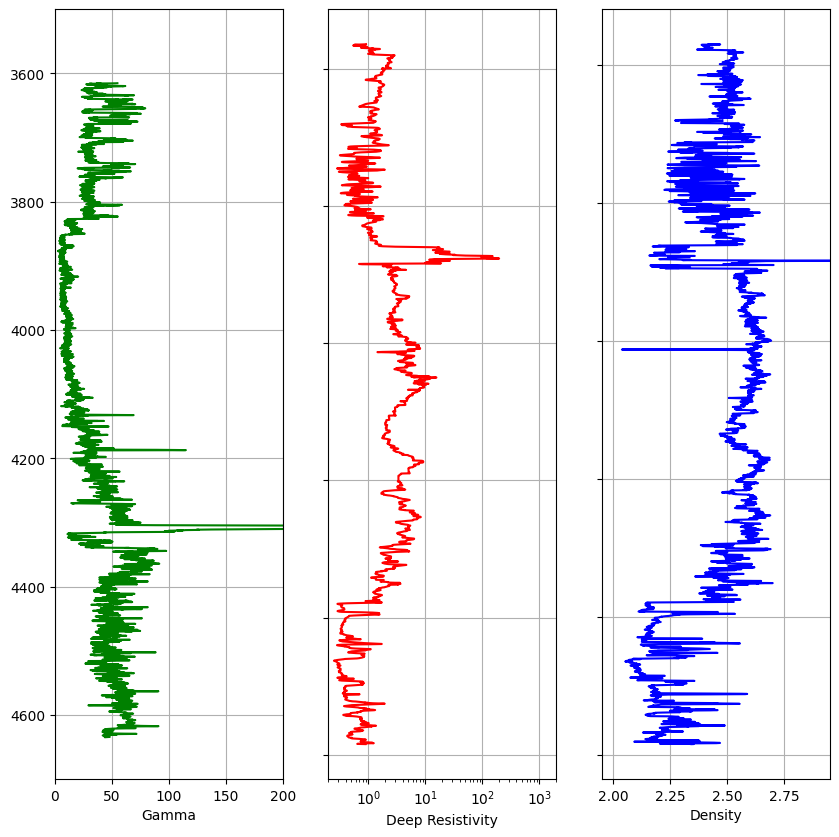

In [ ]:
#Creating subplot
fig=plt.figure(figsize=(10,10))
#set up the plot axis
ax1=plt.subplot2grid((1,3),(0,0),rowspan=1,colspan=1)
#plot the data
ax1.plot("GR", "DEPTH", data =dataset, color = "green")
ax1.set_xlabel("Gamma") # assign the track
ax1.set_xlim(0,200) # limit of the curve
ax1.set_ylim(4700,3500) # depth limit
ax1.grid() # grid

#Adding Resistivity Plot
ax2=plt.subplot2grid((1,3),(0,1),rowspan=1,colspan=1)
ax2.plot("RDEP","DEPTH",data=dataset,color="red")
ax2.set_xlabel("Deep Resistivity")
ax2.set_xlim(0.2,2000)
ax2.semilogx()  # Resistivity log plot on semilog paper
#ax2.set_ylim(4700,3500)
ax2.grid()

#Adding the density log
ax3=plt.subplot2grid((1,3),(0,2),rowspan=1,colspan=1)
ax3.plot("DEN","DEPTH",data=dataset,color="blue")
ax3.set_xlabel("Density")
ax3.set_xlim(1.95,2.95)
#ax3.set_ylim(4700,3500)
ax3.grid()#Reducing the space between track due to depth level
for i in [ax2,ax3]:
    plt.setp(i.get_yticklabels(), visible=False)



